# Tutorial 0: First JOOMMF notebook

The goal of this tutorial is to familiarise users with basics of running JOOMMF simulations in Jupyter notebook. The only thing you need to know for this tutorial is how to execute individual cells: this is done by pressing `Shift` + `Return` (`Return` = `Enter`).

## Simple JOOMMF simulation

Before we specify and run the simulation, we have to import JOOMMF modules we intend to use.

In [1]:
import oommfc as oc
import discretisedfield as df

# The following line enables plotting inside the notebook.
%matplotlib inline

### System

The object on which different drivers act on in JOOMMF is called `System`. In order to define the micromagnetic system we intend to simulate, we have to specify:

1. Hamiltonian,
2. Dynamics equation,
3. Magnetisation configuration.

In [2]:
system = oc.System(name="first-joommf-simulation")

#### Hamiltonian

Hamiltonian for the first JOOMMF simulaton is very simple and contains only:

1. exchange,
2. demagnetisation,
3. Zeeman energy terms.

We will apply an external magnetic field in the $x$ direction for the purpose of this demonstration:

In [3]:
A = 1e-12  # exchange energy constant (J/m)
H = (5e6, 0, 0)  # external magnetic field in the x-direction (A/m)
system.hamiltonian = oc.Exchange(A=A) + oc.Demag() + oc.Zeeman(H=H)

#### Dynamics equation

The dynamics equation contains only precession and damping terms:

In [4]:
gamma = 2.211e5  # gamma parameter (m/As)
alpha = 0.2  # Gilbert damping
system.dynamics = oc.Precession(gamma=gamma) + oc.Damping(alpha=alpha)

#### Initial magnetisation

We initialise the system in positive $y$ direction, i.e. (0, 1, 0), which is different from the equlibrium state we expect for the external Zeeman field applied in $x$ direction:

In [5]:
L = 100e-9  # cubic sample edge length (m)
d = 5e-9  # discretisation cell size (m)
mesh = oc.Mesh(p1=(0, 0, 0), p2=(L, L, L), cell=(d, d, d))

Ms = 8e6  # saturation magnetisation (A/m)
system.m = df.Field(mesh, value=(0, 1, 0), norm=Ms)

### Inspect the properties of the stsrem

We can check the characteristics of the system we defined by asking objects to represent themselves:

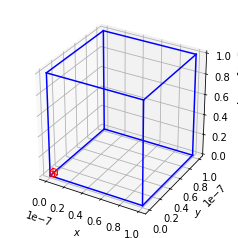

In [6]:
mesh

In [7]:
system.hamiltonian

Exchange(A=1e-12, name="exchange") + Demag(name="demag") + Zeeman(H=(5000000.0, 0, 0), name="zeeman")

In [8]:
system.dynamics

Precession(gamma=221100.0, name="precession") + Damping(alpha=0.2, name="damping")

We can also visualise the current magnetisation field:

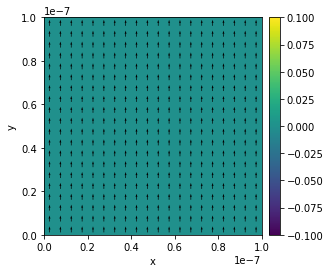

In [9]:
system.m.plot_plane("z")

### Driving the system

After the system object is created, we can minimise its energy (relax it) using the Minimisation Driver (`MinDriver`).

In [10]:
md = oc.MinDriver()
md.drive(system)

2018/07/14 20:18: Running OOMMF (first-joommf-simulation/first-joommf-simulation.mif) ... (2.3 s)


The system is now relaxed, and we can plot its slice and compute its average magnetisation.

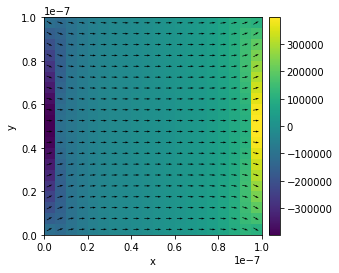

In [14]:
system.m.plot_plane("z")

In [12]:
system.m.average

(7850881.329153018, 4.944646859075874e-05, -1.752050593495369e-11)

We can see that the magnetisation is aligned along the $x$ direction, as expected having in mind we applied the external magnetic field in that direction.